In [16]:
import numpy as np
import math
from qiskit import *
import matplotlib
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
import qiskit_aer
import matplotlib.pyplot as plt
from qutip import *

In [17]:
backend = qiskit_aer.Aer.get_backend('statevector_simulator')

In [18]:
N_points = 50
tlist = np.linspace(0, 2.3, N_points)

In [19]:
H_total = sigmax() + sigmaz()
# intial state
psi0 = thermal_dm(2, 0)
results = mesolve(rho0=psi0, H=H_total, tlist=tlist, options=Options(nsteps=100000))

In [20]:
trotter_steps = 20

Sx_qiskit = np.zeros(N_points)
Sy_qiskit = np.zeros(N_points)
Sz_qiskit = np.zeros(N_points)

for i in range(len(tlist)):
    
    t = tlist[i]

    # Create a Quantum Circuit acting on a quantum register of three qubits
    circ = QuantumCircuit(1)
    
    for j in range(trotter_steps):

        circ.rx(2*t/trotter_steps, 0)
        circ.rz(2*t/trotter_steps, 0)

    job=backend.run(circ)
    result = job.result()
    state_vec = result.get_statevector()
    
    alpha_real = state_vec[0].real
    alpha_imag = state_vec[0].imag
    alpha_theta = math.atan(alpha_imag/alpha_real) 

    if alpha_real < 0 and alpha_imag > 0 :
        alpha_theta = math.atan(alpha_imag/alpha_real) + math.pi

    if alpha_real < 0 and alpha_imag < 0 :
        alpha_theta = math.atan(alpha_imag/alpha_real) + math.pi

    r_alpha = math.sqrt((alpha_real**2) + (alpha_imag**2))

    beta_real = state_vec[1].real
    beta_imag = state_vec[1].imag
    beta_theta = math.atan(beta_imag/beta_real) 

    if beta_real < 0 and beta_imag > 0 :
        beta_theta = math.atan(beta_imag/beta_real) + math.pi

    if beta_real < 0 and beta_imag < 0 :
        beta_theta = math.atan(beta_imag/beta_real) + math.pi

    r_beta = math.sqrt((beta_real**2) + (beta_imag**2))

    phi = beta_theta - alpha_theta

    theta = 2 * np.arccos(r_alpha)

    Sx_qiskit[i] = math.sin(theta)*math.cos(phi)
    Sy_qiskit[i] = math.sin(theta)*math.sin(phi)
    Sz_qiskit[i] = math.cos(theta)

/tmp/ipykernel_16854/2453055257.py:37: RuntimeWarning: invalid value encountered in scalar divide
  beta_theta = math.atan(beta_imag/beta_real)


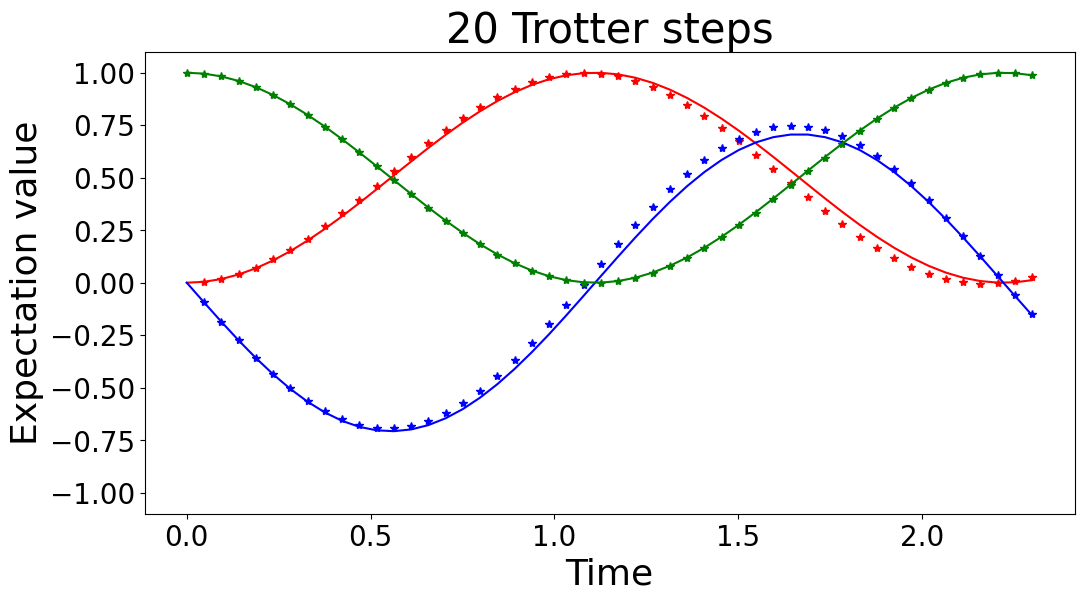

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(Sx_qiskit), 'r*')
ax.plot(tlist, np.real(Sy_qiskit), 'b*')
ax.plot(tlist, np.real(Sz_qiskit), 'g*')
ax.plot(tlist, expect(results.states, sigmax()), 'r')
ax.plot(tlist, expect(results.states, sigmay()), 'b')
ax.plot(tlist, expect(results.states, sigmaz()), 'g')
# ax.legend(("Sx trotter", "Sy trotter", "Sz trotter", "Sx exact", "Sy exact", "Sz exact"), fontsize=20,
#         bbox_to_anchor =(0.65, 1.25))

ax.set_title(str(trotter_steps)+ ' Trotter steps', fontsize=30)

#ax.set_title('Exact simulation using QuTip', fontsize=30)
# ax.legend(("Sx_exact", "Sy_exact", "Sz_exact"), fontsize=20)

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(20)
    
#plt.xlim(4,8)
plt.ylim(-1.1, 1.1)

ax.set_xlabel('Time', fontsize=26)
ax.set_ylabel('Expectation value', fontsize=26);